In [ ]:
pip install -U numba

In [ ]:
pip install -U shap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adasyn_wo_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/adasyn_wo_triggers_train.csv")
adasyn_wo_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/adasyn_wo_triggers_test.csv")

adasyn_w_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/adasyn_w_triggers_train.csv")
adasyn_w_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/adasyn_w_triggers_test.csv")


smote_wo_triggers_train= pd.read_csv("/content/drive/MyDrive/Data/smote_wo_triggers_train.csv")
smote_wo_triggers_test= pd.read_csv("/content/drive/MyDrive/Data/smote_wo_triggers_test.csv")

smote_w_triggers_train = pd.read_csv("/content/drive/MyDrive/Data/smote_w_triggers_train.csv")
smote_w_triggers_test = pd.read_csv("/content/drive/MyDrive/Data/smote_w_triggers_test.csv")

mwmote_wo_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/mwmote_wo_triggers_train.csv")
mwmote_wo_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/mwmote_wo_triggers_test.csv")

mwmote_w_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/mwmote_w_triggers_train.csv")
mwmote_w_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/mwmote_w_triggers_test.csv")

rose_wo_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/rose_wo_triggers_train.csv")
rose_wo_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/rose_wo_triggers_test.csv")

rose_w_triggers_train=pd.read_csv("/content/drive/MyDrive/Data/rose_w_triggers_train.csv")
rose_w_triggers_test=pd.read_csv("/content/drive/MyDrive/Data/rose_w_triggers_test.csv")

# Adasyn without Triggers

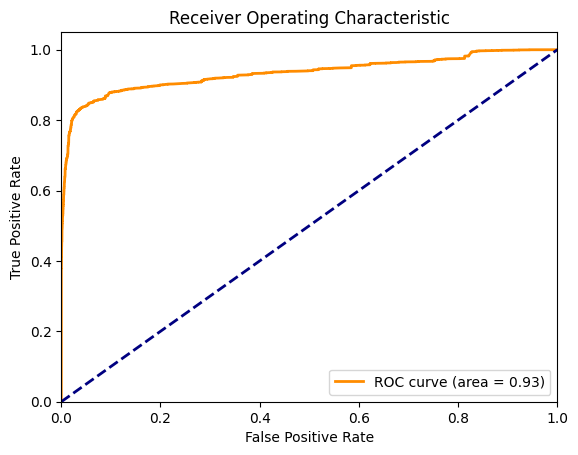

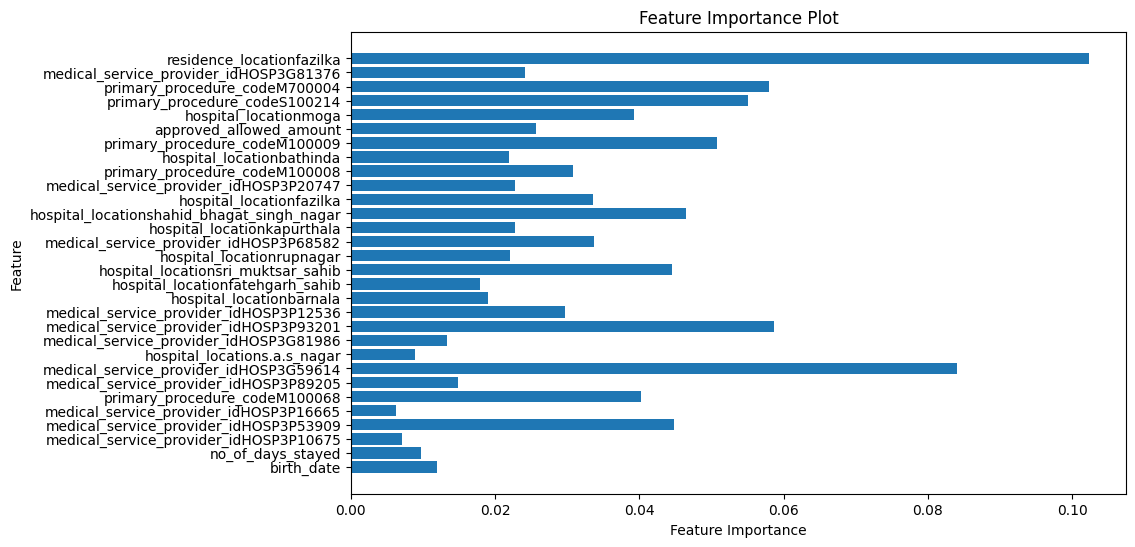

In [ ]:

X_train = adasyn_wo_triggers_train.drop(columns=["fraud"])
y_train = adasyn_wo_triggers_train["fraud"]

X_test = adasyn_wo_triggers_test.drop(columns=["fraud"])
y_test = adasyn_wo_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


## SHAP

In [ ]:
feature_names = list(X_test.columns.values)
print("The Column Header :", feature_names)

The Column Header : ['birth_date', 'no_of_days_stayed', 'medical_service_provider_idHOSP3P10675', 'medical_service_provider_idHOSP3P53909', 'medical_service_provider_idHOSP3P16665', 'primary_procedure_codeM100068', 'medical_service_provider_idHOSP3P89205', 'medical_service_provider_idHOSP3G59614', 'hospital_locations.a.s_nagar', 'medical_service_provider_idHOSP3G81986', 'medical_service_provider_idHOSP3P12536', 'hospital_locationbarnala', 'medical_service_provider_idHOSP3P93201', 'hospital_locationfatehgarh_sahib', 'hospital_locationsri_muktsar_sahib', 'hospital_locationrupnagar', 'medical_service_provider_idHOSP3P68582', 'hospital_locationkapurthala', 'hospital_locationshahid_bhagat_singh_nagar', 'hospital_locationfazilka', 'medical_service_provider_idHOSP3P20747', 'approved_allowed_amount', 'primary_procedure_codeM100008', 'hospital_locationbathinda', 'primary_procedure_codeM100009', 'primary_procedure_codeS100214', 'categoryTraders.Familes', 'hospital_locationmoga', 'primary_procedu

### Calculating Shap Values


In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values_awot = explainer.shap_values(X_test)

### Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


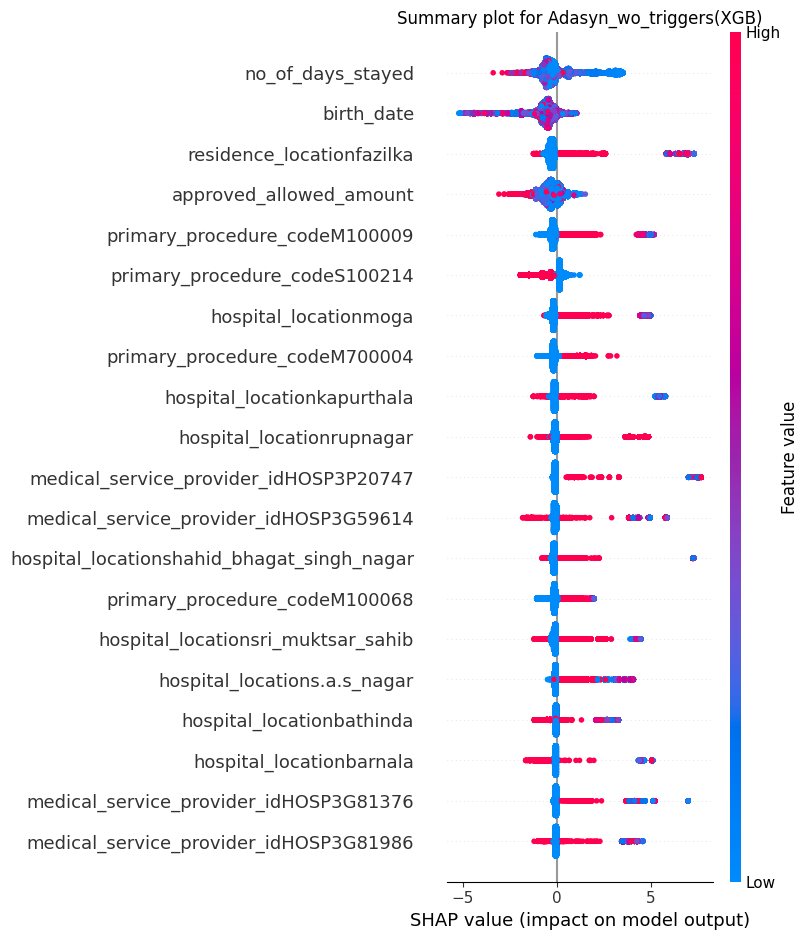

In [ ]:
plt.title("Summary plot for Adasyn_wo_triggers(XGB)")
shap.summary_plot(shap_values_awot, X_test, feature_names=feature_names)

# Adasyn with Triggers

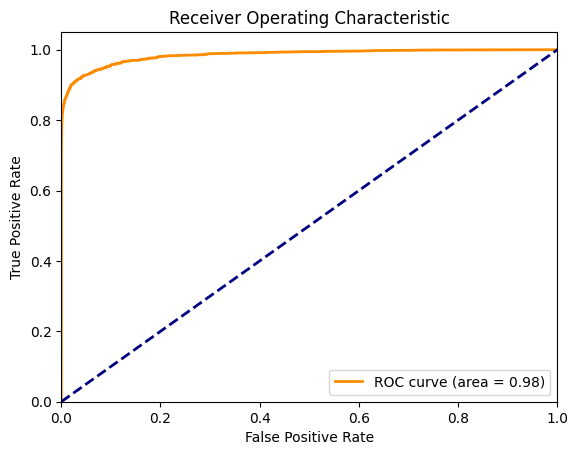

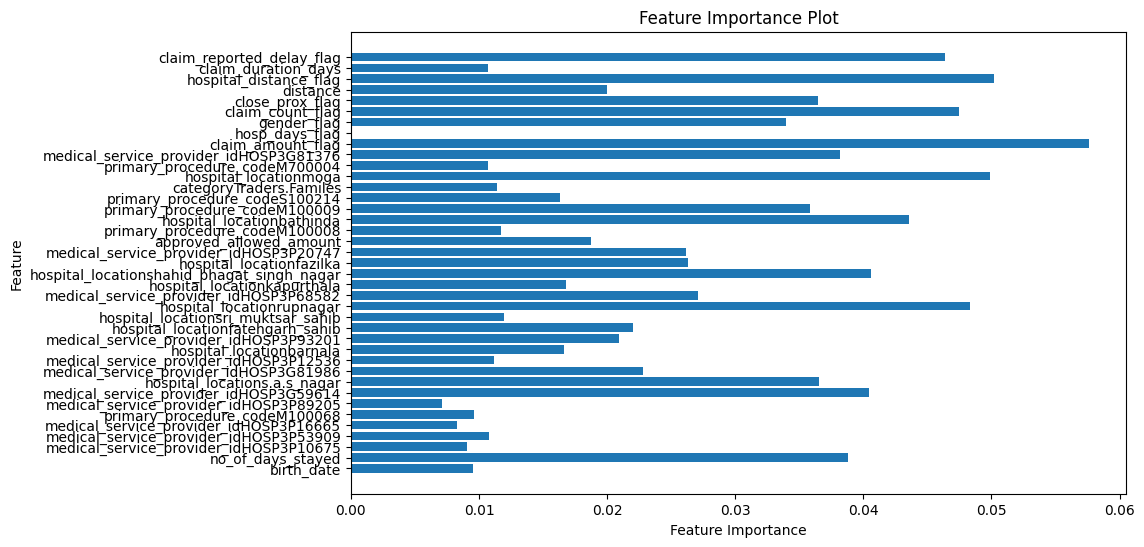

In [ ]:
# Load your datasets (replace with your actual data loading code)
X_train = adasyn_w_triggers_train.drop(columns=["fraud"])
y_train = adasyn_w_triggers_train["fraud"]

X_test = adasyn_w_triggers_test.drop(columns=["fraud"])
y_test = adasyn_w_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.rcParams['font.family'] = 'Sans-Serif'
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## SHAP

### Calculating SHAP values

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values_awt = explainer.shap_values(X_test)

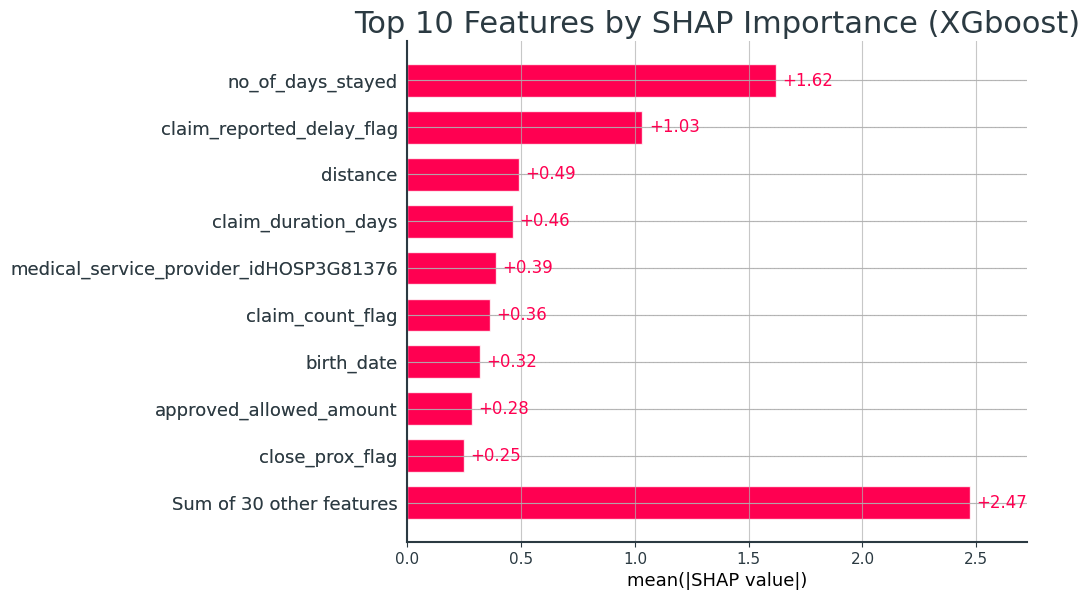

In [ ]:
plt.title('Top 10 Features by SHAP Importance (XGboost)')
plt.grid(True, axis='x', linestyle='-', alpha=0.7)
plt.grid(True, axis='y', linestyle='-', alpha=0.7)
shap.plots.bar(shap_values, max_display=10)
plt.show()

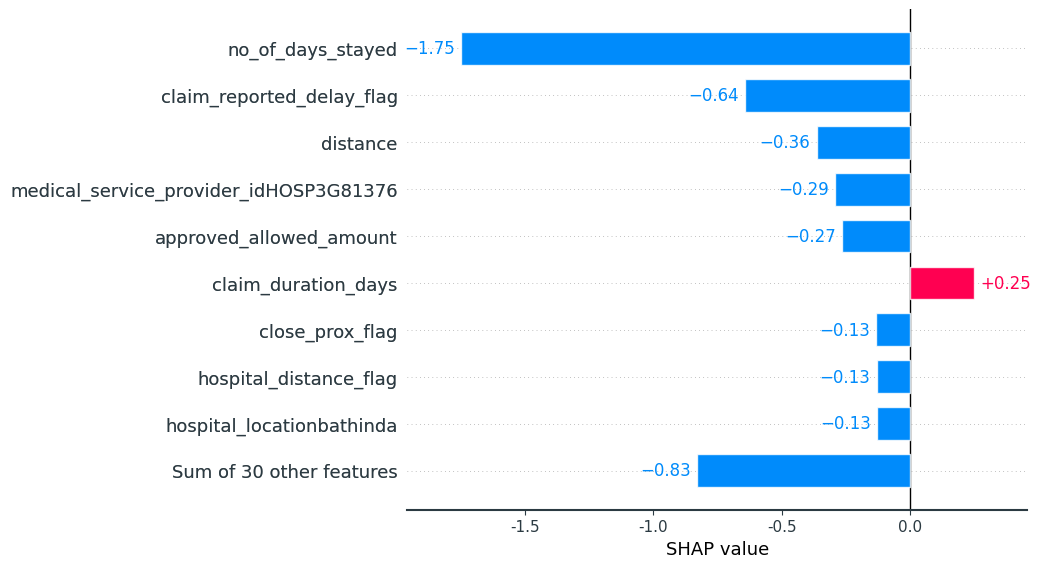

In [ ]:
shap.plots.bar(shap_values[0])

AttributeError: ignored

In [ ]:
mean_shap_values = np.abs(shap_values_awt).mean(0)
mean_shap_values.shape

(39,)

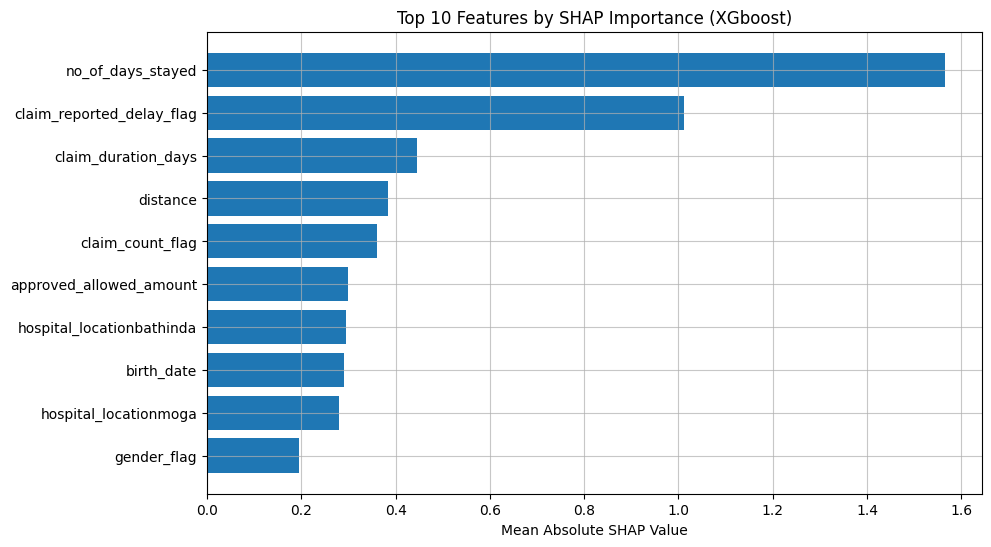

In [ ]:
mean_shap_values = np.abs(shap_values_awt).mean(0)
feature_names = X_test.columns

top_10_indices = np.argsort(mean_shap_values)[-10:]
top_10_feature_names = feature_names[top_10_indices]
top_10_mean_shap_values = mean_shap_values[top_10_indices]

# Create a bar plot to display mean SHAP values for the top 10 features
plt.figure(figsize=(10, 6))
plt.grid(True, axis='x', linestyle='-', alpha=0.7)
plt.grid(True, axis='y', linestyle='-', alpha=0.7)
plt.barh(range(len(top_10_feature_names)), top_10_mean_shap_values, tick_label=top_10_feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 10 Features by SHAP Importance (XGboost)')

# Display the plot
plt.show()

In [ ]:
top_10_mean_shap_values.shape

(10,)

### Feature importance


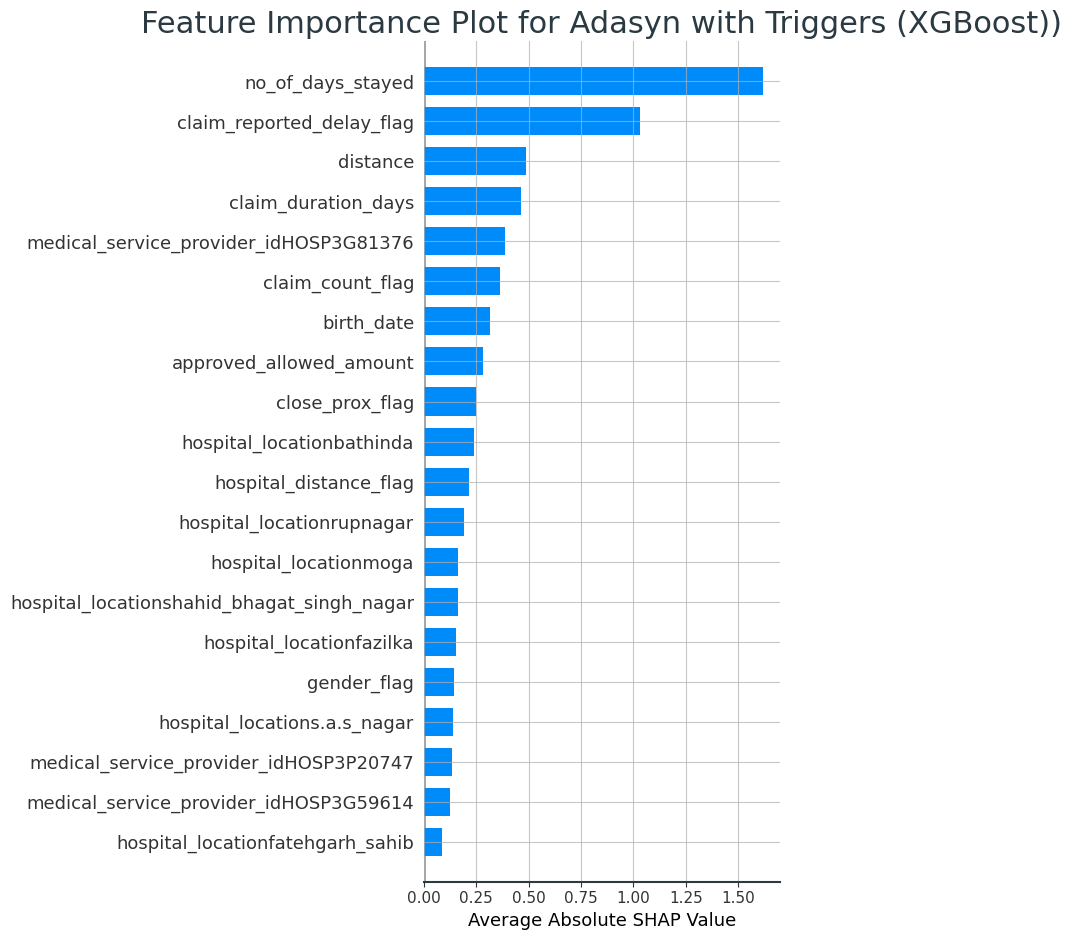

In [ ]:
plt.figure(figsize=(10, 10))
plt.grid(True, axis='x', linestyle='-', alpha=0.7)
plt.grid(True, axis='y', linestyle='-', alpha=0.7)
# Plot feature importance
plt.title("Feature Importance Plot for Adasyn with Triggers (XGBoost))")
shap.summary_plot(shap_values, X_test, plot_type='bar' ,show=False)
plt.xlabel('Average Absolute SHAP Value')
plt.show()

### Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


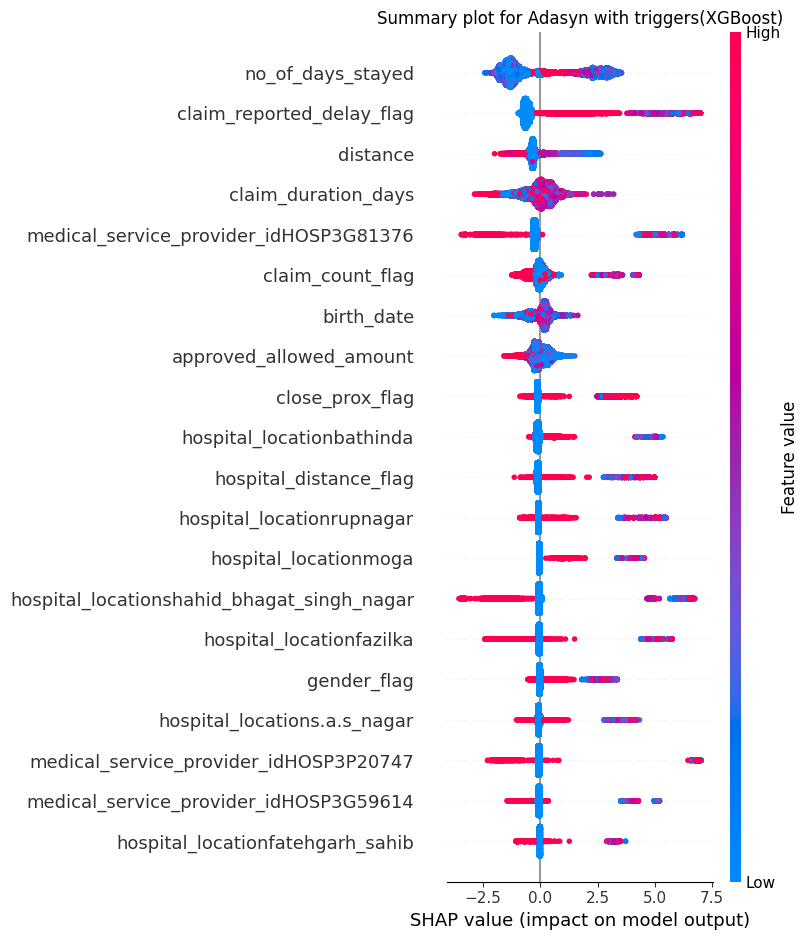

In [ ]:
plt.title("Summary plot for Adasyn with triggers(XGBoost)")
shap.summary_plot(shap_values_awt, X_test, feature_names=feature_names)

In [ ]:
shap.dependence_plot('no_of_days_stayed', shap_values_awt, X_test)

TypeError: ignored

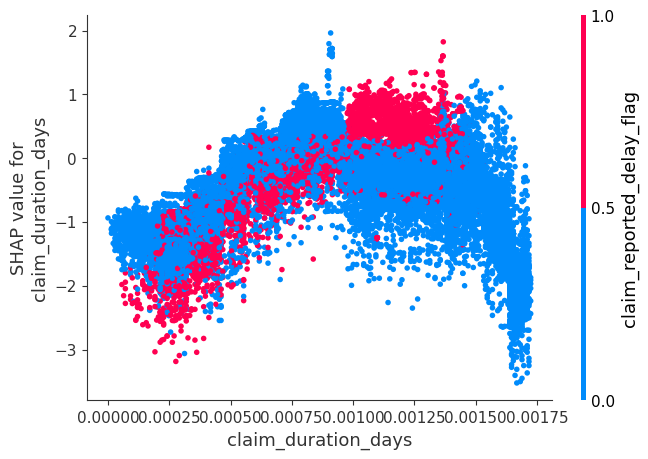

In [ ]:
shap.dependence_plot('claim_duration_days', shap_values_awt, X_test)

# Smote without Triggers

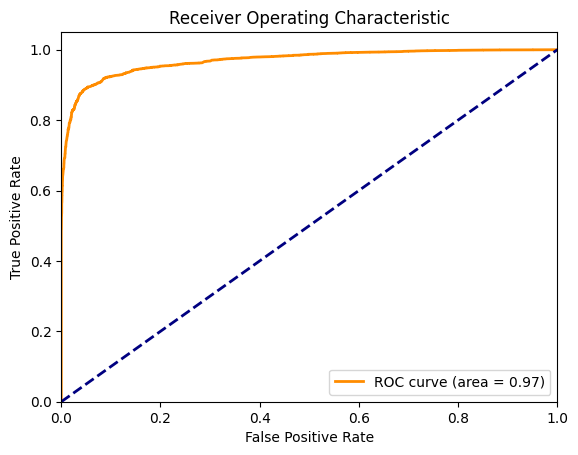

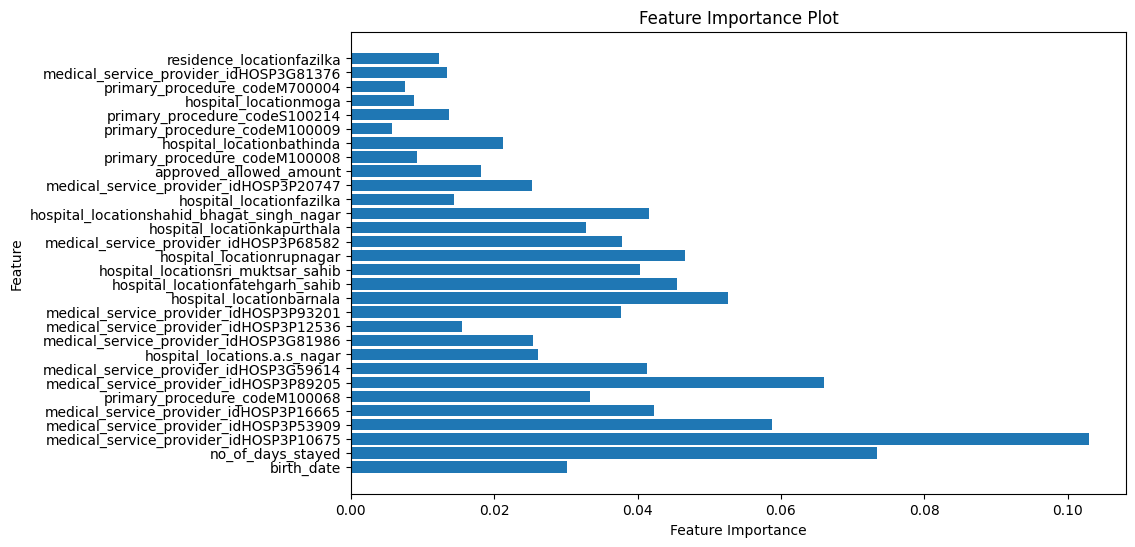

In [ ]:
X_train = smote_wo_triggers_train.drop(columns=["fraud"])
y_train = smote_wo_triggers_train["fraud"]

X_test = smote_wo_triggers_test.drop(columns=["fraud"])
y_test = smote_wo_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model_swo = xgb.XGBClassifier()

# Train the model
xgb_model_swo.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model_swo.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_swo.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model_swo.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


## SHAP

### Calculating SHAP values

In [ ]:
explainer = shap.Explainer(xgb_model_swo)
shap_values_swo= explainer.shap_values(X_test)

### Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


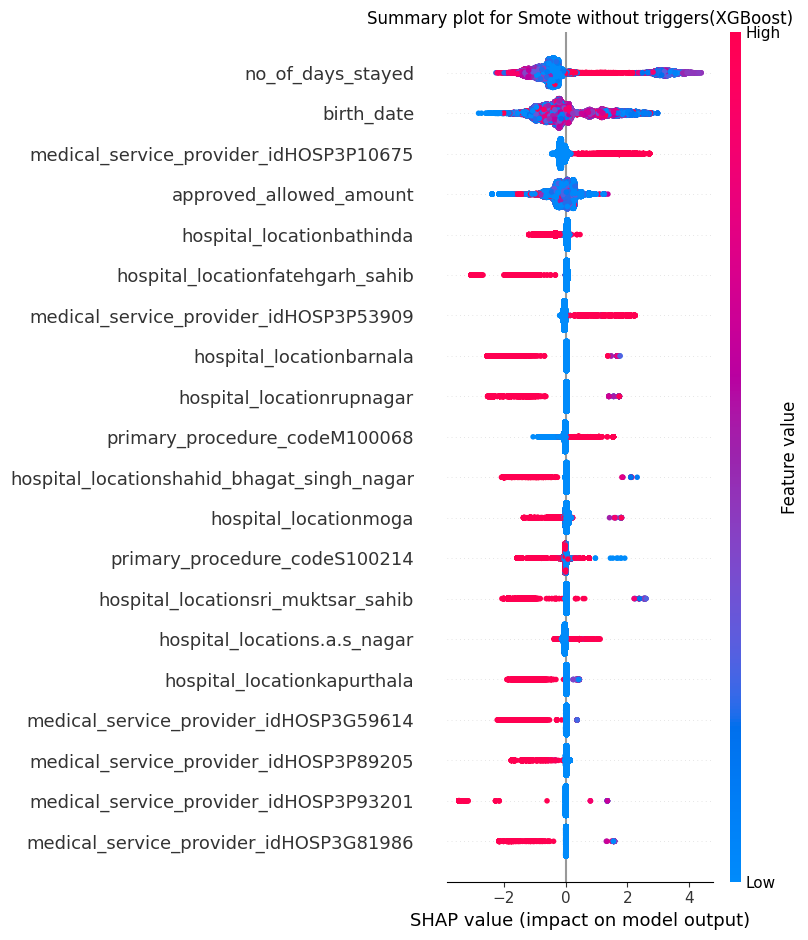

In [ ]:
plt.title("Summary plot for Smote without triggers(XGBoost)")
shap.summary_plot(shap_values_swo, X_test, feature_names=feature_names)

# Smote With Triggers

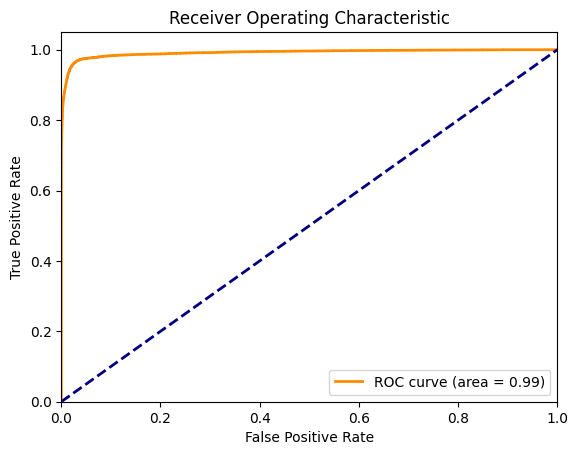

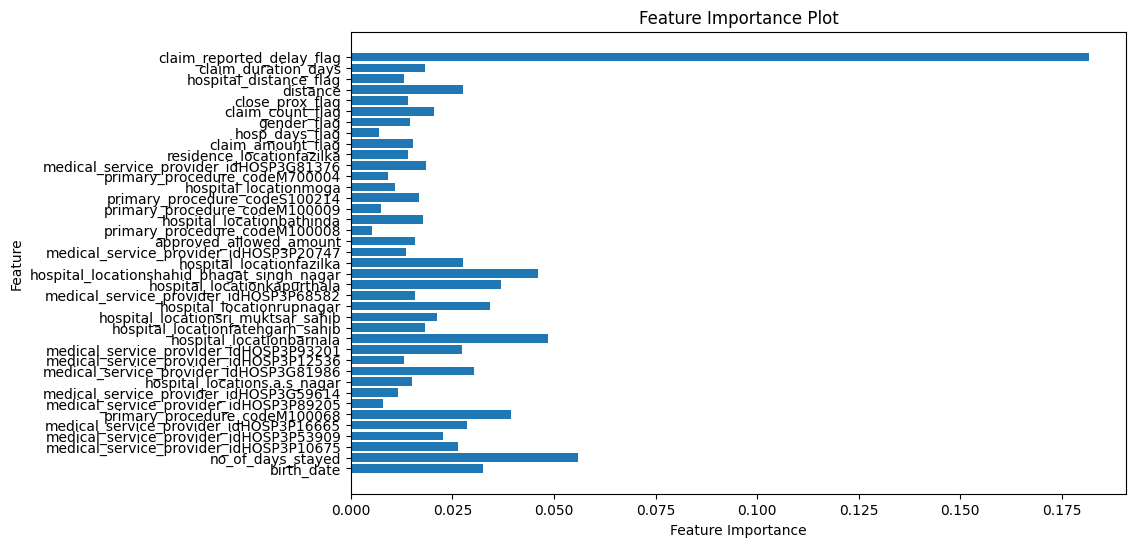

In [ ]:
X_train = smote_w_triggers_train.drop(columns=["fraud"])
y_train = smote_w_triggers_train["fraud"]

X_test = smote_w_triggers_test.drop(columns=["fraud"])
y_test = smote_w_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model_sw = xgb.XGBClassifier()

# Train the model
xgb_model_sw.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model_sw.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_sw.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model_sw.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## SHAP

### Calculating SHAP Values

In [ ]:
explainer = shap.Explainer(xgb_model_sw)
shap_values_sw= explainer.shap_values(X_test)

### Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


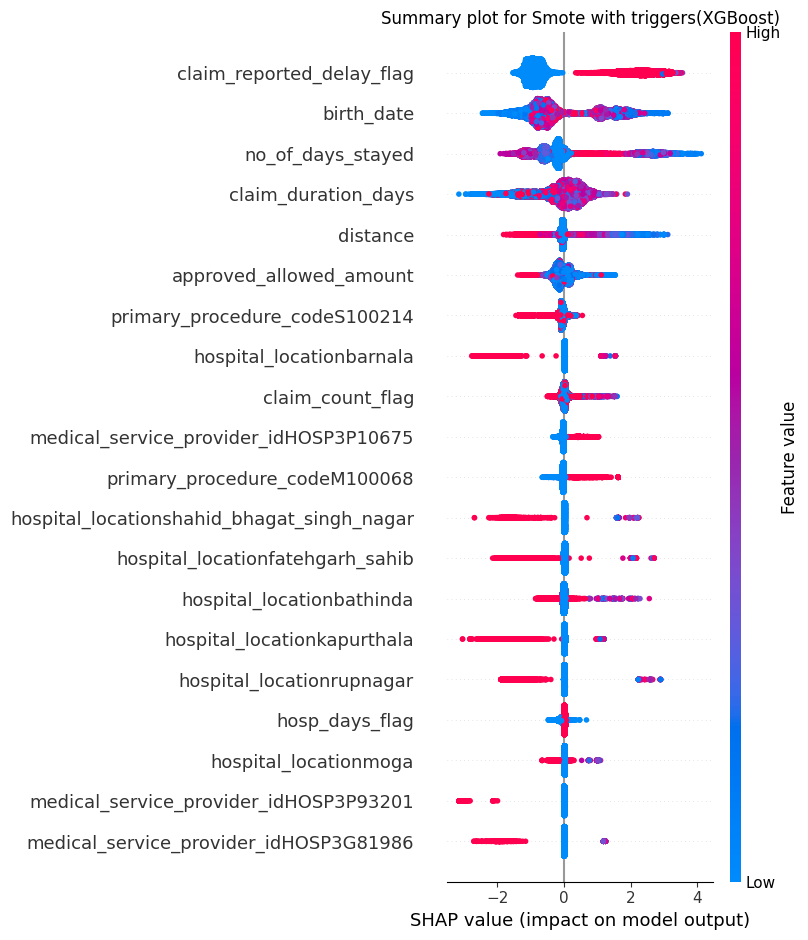

In [ ]:
plt.title("Summary plot for Smote with triggers(XGBoost)")
shap.summary_plot(shap_values_sw, X_test, feature_names=feature_names)

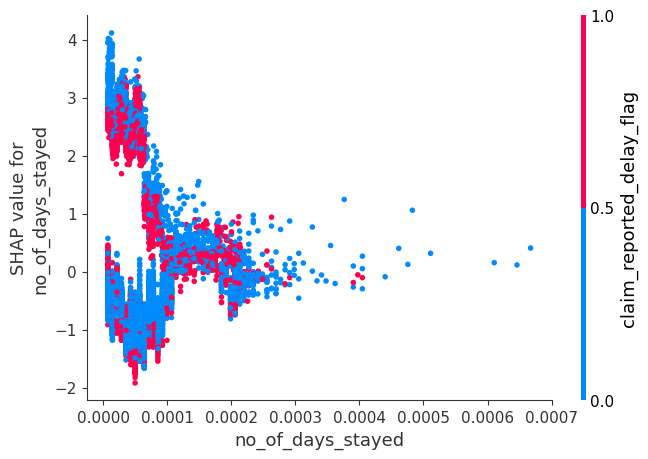

In [ ]:
shap.dependence_plot('no_of_days_stayed', shap_values_sw, X_test)

# MWMOTE without Triggers

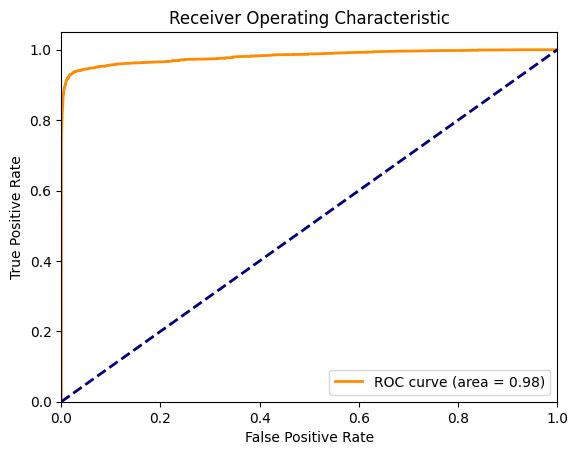

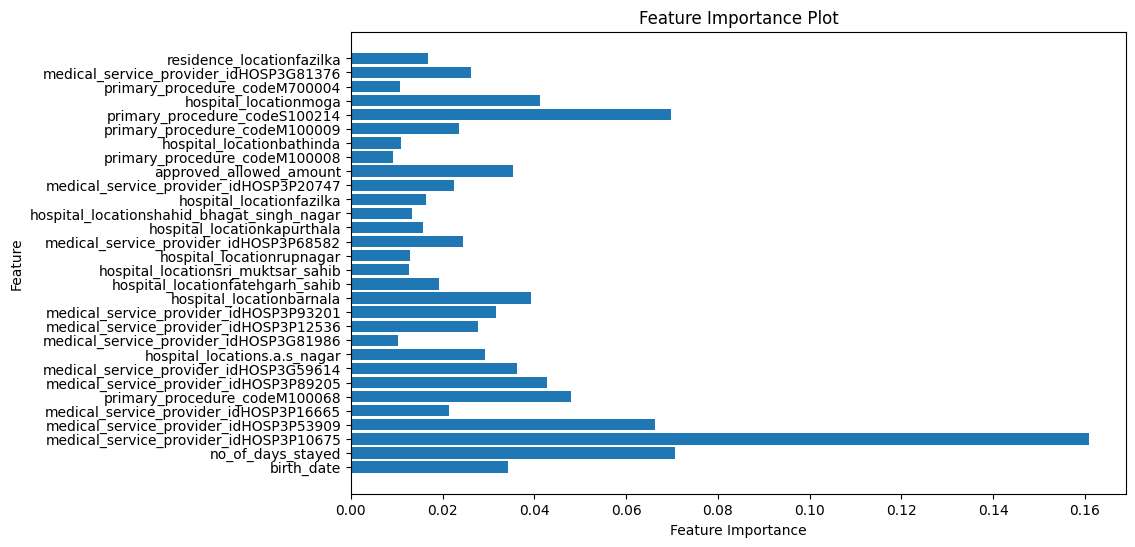

In [ ]:
X_train = mwmote_wo_triggers_train.drop(columns=["fraud"])
y_train = mwmote_wo_triggers_train["fraud"]

X_test = mwmote_wo_triggers_test.drop(columns=["fraud"])
y_test = mwmote_wo_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model_mwo = xgb.XGBClassifier()

# Train the model
xgb_model_mwo.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model_mwo.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_mwo.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model_mwo.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## SHAP

### Calculating the Shap Values

In [ ]:
explainer = shap.Explainer(xgb_model_mwo)
shap_values_mwo= explainer.shap_values(X_test)

### Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


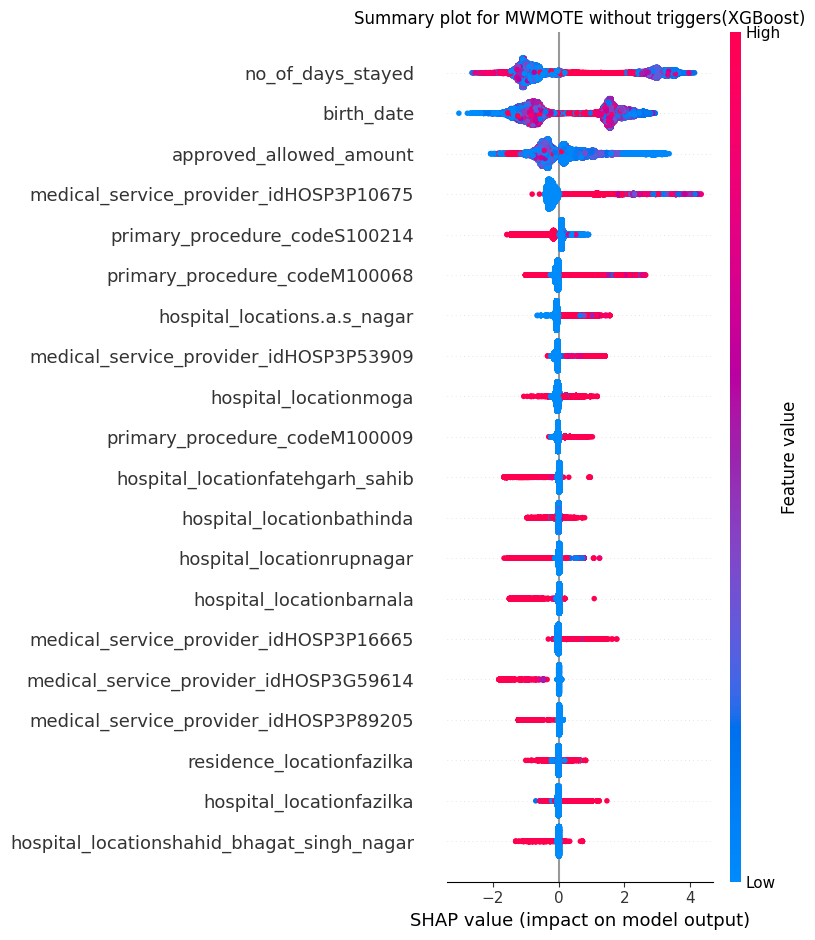

In [ ]:
plt.title("Summary plot for MWMOTE without triggers(XGBoost)")
shap.summary_plot(shap_values_mwo, X_test, feature_names=feature_names)

# MWMOTE with Triggers

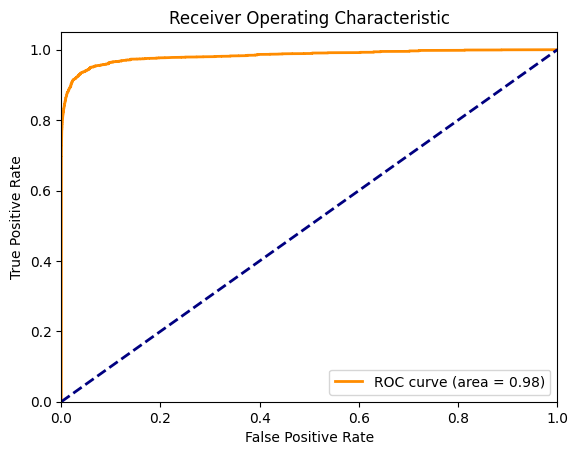

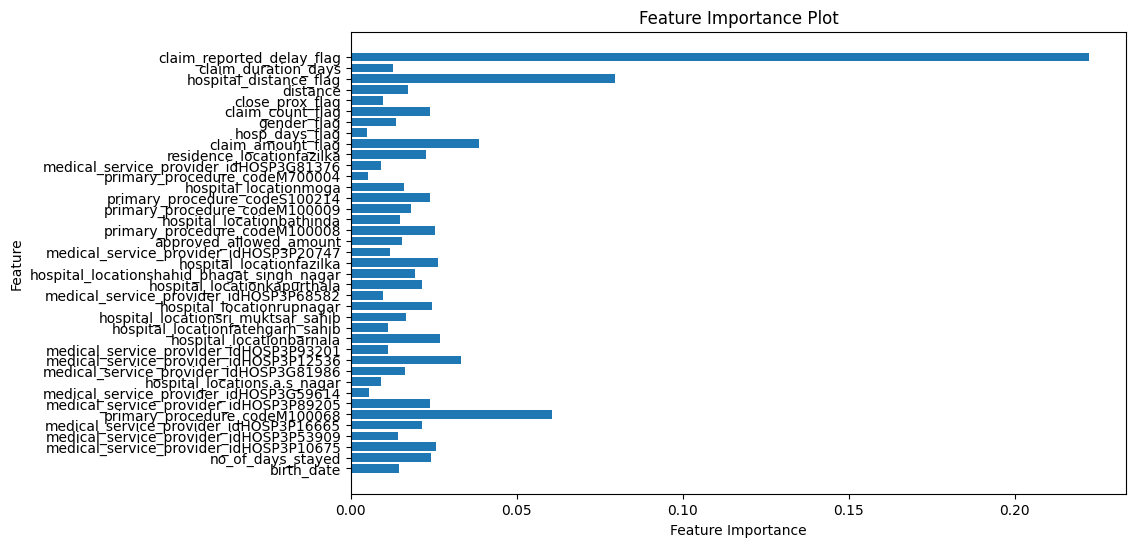

In [ ]:
X_train = mwmote_w_triggers_train.drop(columns=["fraud"])
y_train = mwmote_w_triggers_train["fraud"]

X_test = mwmote_w_triggers_test.drop(columns=["fraud"])
y_test = mwmote_w_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model_mw = xgb.XGBClassifier()

# Train the model
xgb_model_mw.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model_mw.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_mw.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model_mw.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## SHAP

### Calculating Shap Values

In [ ]:
explainer = shap.Explainer(xgb_model_mw)
shap_values_mw= explainer.shap_values(X_test)

### Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


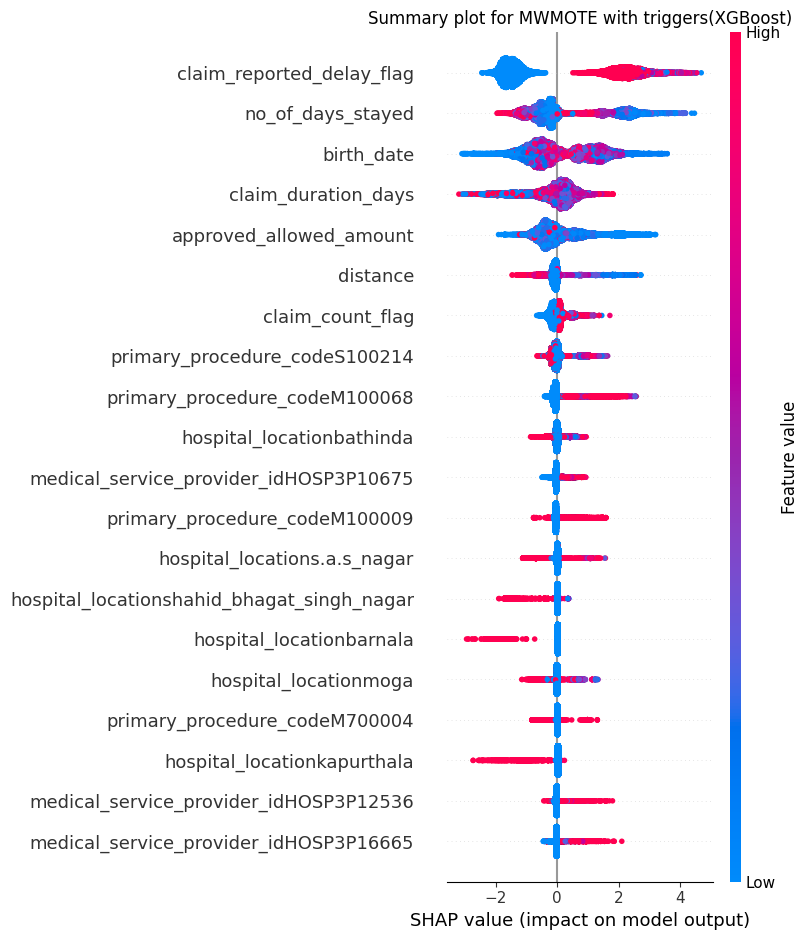

In [ ]:
plt.title("Summary plot for MWMOTE with triggers(XGBoost)")
shap.summary_plot(shap_values_mw, X_test, feature_names=feature_names)

# Rose without Triggers

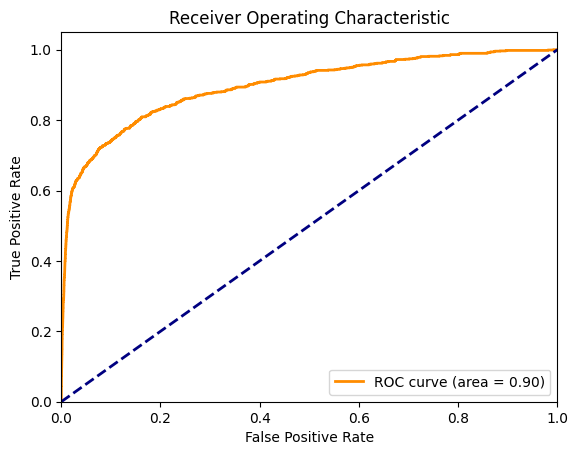

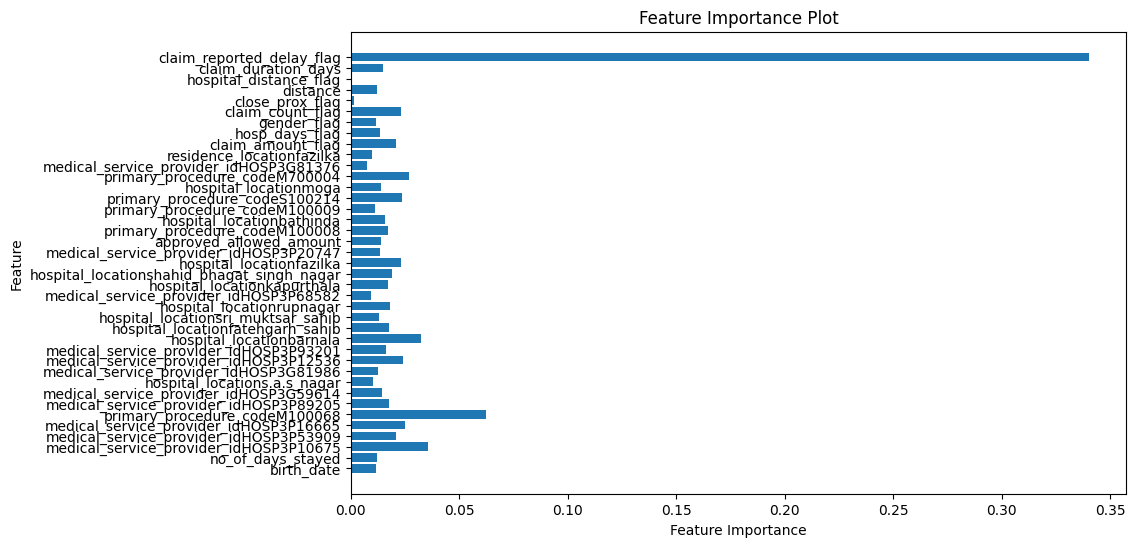

In [ ]:
X_train = rose_w_triggers_train.drop(columns=["fraud"])
y_train = rose_w_triggers_train["fraud"]

X_test = rose_w_triggers_test.drop(columns=["fraud"])
y_test = rose_w_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model_rwo = xgb.XGBClassifier()

# Train the model
xgb_model_rwo.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model_rwo.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_rwo.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model_rwo.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## SHAP

### Calculating Shap Values

In [ ]:
explainer = shap.Explainer(xgb_model_rwo)
shap_values_rwo= explainer.shap_values(X_test)

### Summary plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


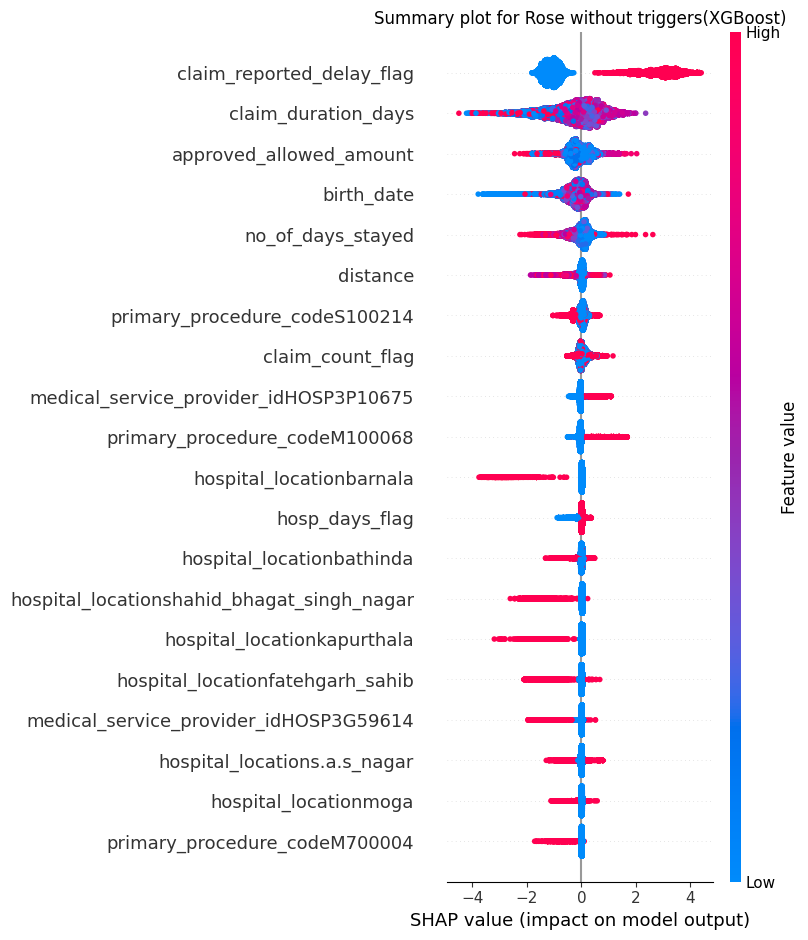

In [ ]:
plt.title("Summary plot for Rose without triggers(XGBoost)")
shap.summary_plot(shap_values_rwo, X_test, feature_names=feature_names)

# Rose With Triggers

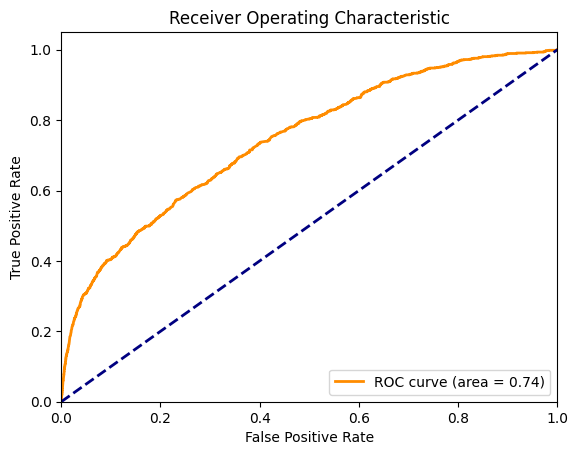

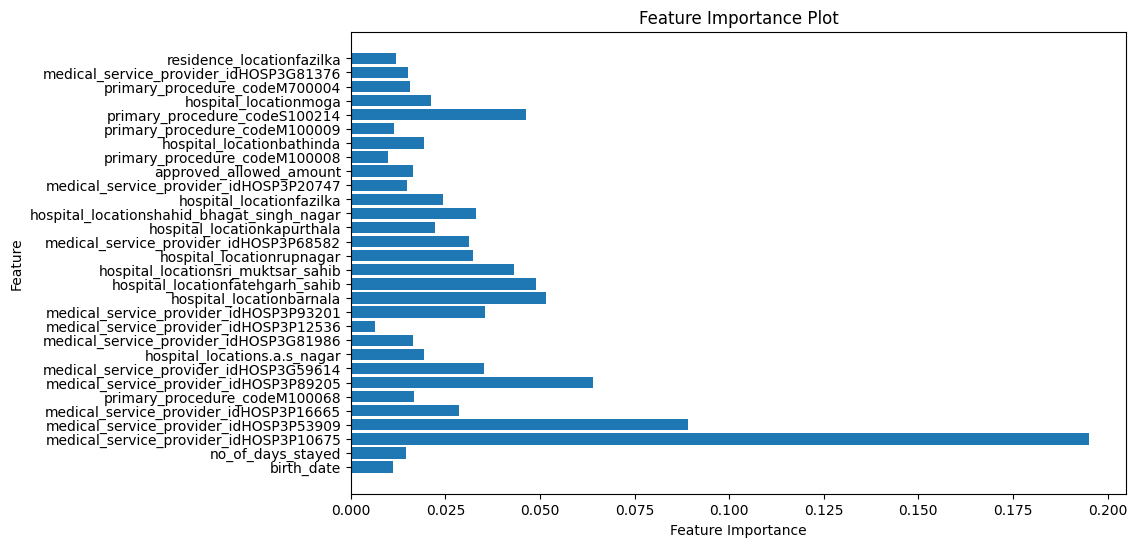

In [ ]:
X_train = rose_wo_triggers_train.drop(columns=["fraud"])
y_train = rose_wo_triggers_train["fraud"]

X_test = rose_wo_triggers_test.drop(columns=["fraud"])
y_test = rose_wo_triggers_test["fraud"]

# Initialize the XGBoost classifier
xgb_model_rw = xgb.XGBClassifier()

# Train the model
xgb_model_rw.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model_rw.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_rw.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Get feature importances
feature_importances = xgb_model_rw.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## SHAP

### Calculating Shap Values

In [ ]:
explainer = shap.Explainer(xgb_model_rw)
shap_values_rw= explainer.shap_values(X_test)

### Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


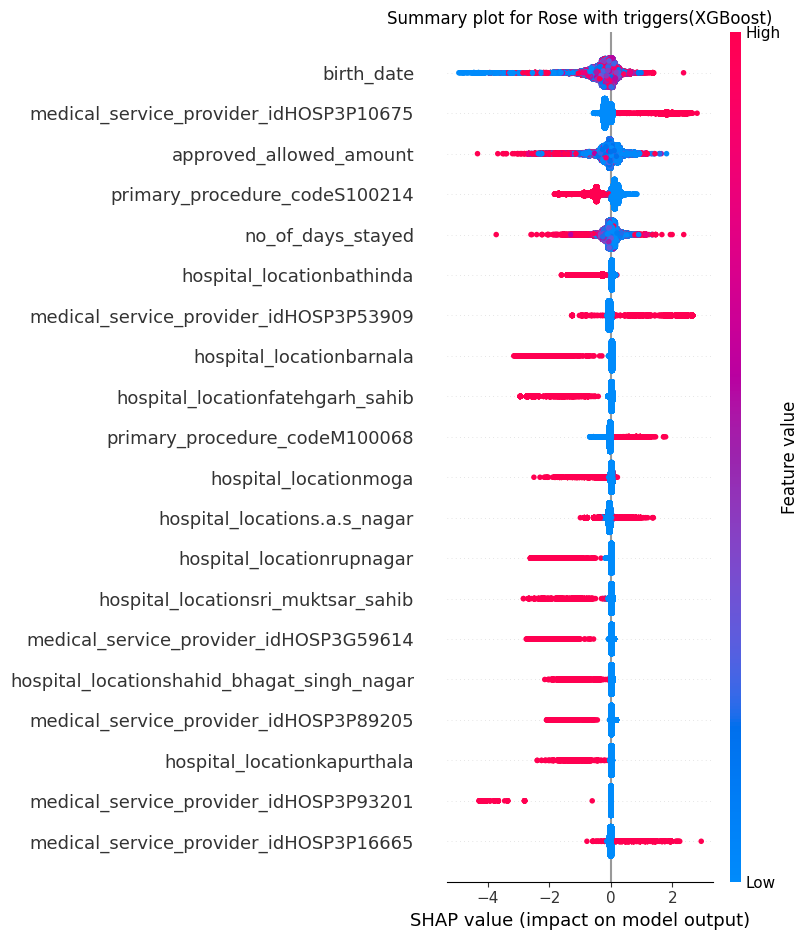

In [ ]:
plt.title("Summary plot for Rose with triggers(XGBoost)")
shap.summary_plot(shap_values_rw, X_test, feature_names=feature_names)